In [38]:
import pandas as pd
import pystan
import numpy as np
import pickle
import xarray as xr
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
vino_data=pd.read_csv("winequality-red.csv",delimiter=";")
vino_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
x = vino_data['fixed acidity'].values

In [43]:
x

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

In [51]:
y = vino_data['volatile acidity'].values
z = vino_data['citric acid'].values

In [52]:
sns.set()  
np.random.seed(101)

vino_code =  """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] z;
}
parameters {
    real alpha;
    real beta;
    real beta1;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x + beta1*z, sigma);
}
"""

In [53]:
data = {'N': len(x), 'x': x, 'y': y, 'z':z}
sm = pystan.StanModel(model_code=vino_code)
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)
    

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_822008989a3eaf6e64c81777040f445a NOW.


In [58]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.520,0.020,0.485,0.559,0.001,0.000,816.0,1035.0,1.0
beta,0.022,0.003,0.016,0.027,0.000,0.000,751.0,869.0,1.0
beta1,-0.639,0.026,-0.686,-0.590,0.001,0.001,1005.0,1140.0,1.0
sigma,0.147,0.003,0.142,0.152,0.000,0.000,1184.0,1092.0,1.0


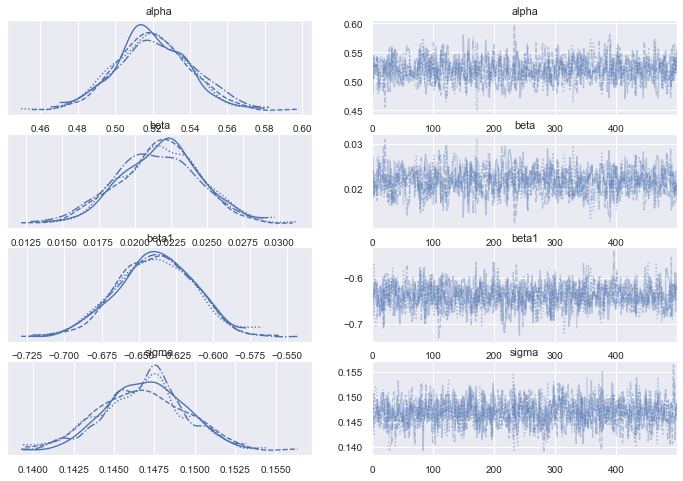

In [59]:
ax = az.plot_trace(fit)